In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import itertools

In [7]:
df = pd.read_csv('heart.csv')

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]

In [10]:
y=df['output'] 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
Scaler = StandardScaler()

In [13]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape

(227, 13)

In [15]:
y_test.shape


(76,)

In [16]:
Scaler.fit(X_train)
Scaler.mean_


array([5.47092511e+01, 6.91629956e-01, 9.60352423e-01, 1.31854626e+02,
       2.49929515e+02, 1.40969163e-01, 5.19823789e-01, 1.49061674e+02,
       3.30396476e-01, 1.07709251e+00, 1.37885463e+00, 7.35682819e-01,
       2.35242291e+00])

In [17]:
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

In [18]:
X_train

array([[ 0.48138243,  0.66772739,  1.97280439, ...,  1.00093184,
         1.27235513, -0.58706209],
       [-0.64052529, -1.49761715,  0.03834825, ..., -0.61049743,
        -0.74035995, -0.58706209],
       [-0.1917622 , -1.49761715, -0.92887982, ..., -0.61049743,
        -0.74035995, -0.58706209],
       ...,
       [ 1.04233629,  0.66772739, -0.92887982, ..., -0.61049743,
         0.26599759,  1.07872659],
       [ 0.81795475, -1.49761715, -0.92887982, ..., -0.61049743,
        -0.74035995, -0.58706209],
       [ 1.49109938,  0.66772739, -0.92887982, ..., -0.61049743,
         1.27235513,  1.07872659]])

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
Model_KNN = KNeighborsClassifier(n_neighbors=5)
Model_KNN.fit(X,y)

KNeighborsClassifier()

In [21]:
Model_KNN.score(X_test,y_test)

0.39473684210526316

In [22]:
X_train_0 = X_train[y_train==0]
X_train_1 = X_train[y_train==1]


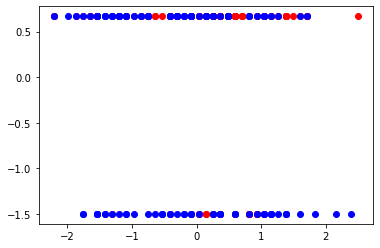

In [23]:
plt.scatter(X_train_0[:,0],X_train_0[:,1],c='red')
plt.scatter(X_train_1[:,0],X_train_1[:,1],c='blue')

In [24]:
y_predict = Model_KNN.predict(X_test)

In [25]:
X_test_0_act = X_test[y_test==0]
X_test_1_act = X_test[y_test==1]
X_test_0_pre = X_test[y_predict==0]
X_test_1_pre = X_test[y_predict==1]


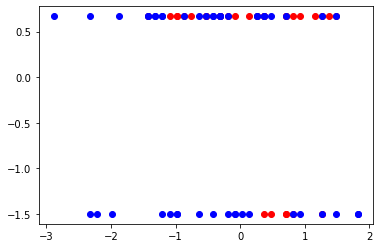

In [26]:
plt.scatter(X_test_0_act[:,0],X_test_0_act[:,1],c='red')
plt.scatter(X_test_1_act[:,0],X_test_1_act[:,1],c='blue')

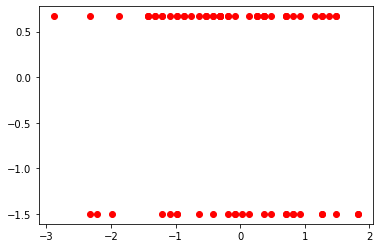

In [27]:
plt.scatter(X_test_0_pre[:,0],X_test_0_pre[:,1],c='red')
plt.scatter(X_test_1_pre[:,0],X_test_1_pre[:,1],c='blue')

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)

In [29]:
cm

array([[30,  0],
       [46,  0]], dtype=int64)

Text(24.0, 0.5, 'Truth')

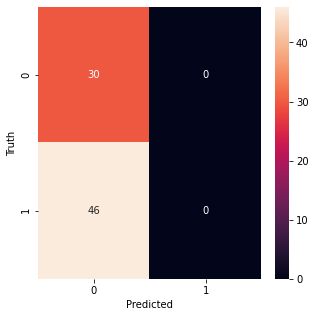

In [30]:
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.39      1.00      0.57        30
           1       0.00      0.00      0.00        46

    accuracy                           0.39        76
   macro avg       0.20      0.50      0.28        76
weighted avg       0.16      0.39      0.22        76

